In [1]:
# pip install -q yfinance

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo

import yfinance as yf


yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN' , 'TSLA']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'TSLA']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN, TSLA]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON", "TESLA"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-09-05,188.279999,189.979996,187.610001,189.699997,188.734222,45280000,APPLE
2023-09-06,188.399994,188.850006,181.470001,182.910004,181.978790,81755800,APPLE
2023-09-07,175.179993,178.210007,173.539993,177.559998,176.656021,112488800,APPLE
2023-09-08,178.350006,180.240005,177.789993,178.179993,177.272873,65551300,APPLE
2023-09-11,180.070007,180.300003,177.339996,179.360001,178.446884,58953100,APPLE
...,...,...,...,...,...,...,...
2024-08-27,213.250000,215.660004,206.940002,209.210007,209.210007,62821400,TESLA
2024-08-28,209.720001,211.839996,202.589996,205.750000,205.750000,64116400,TESLA
2024-08-29,209.800003,214.889999,205.970001,206.279999,206.279999,62308800,TESLA


In [3]:
TSLA.describe()


,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,210.744463,215.001355,206.521792,210.747291,210.747291,1.047822e+08
std,32.653291,33.277318,32.039910,32.664569,32.664569,3.006768e+07
min,140.559998,144.440002,138.800003,142.050003,142.050003,5.086970e+07
25%,181.900002,184.419998,176.959999,180.000000,180.000000,8.291510e+07
50%,210.000000,214.800003,205.770004,208.800003,208.800003,1.037063e+08
75%,240.145004,245.504997,236.385002,240.474998,240.474998,1.214176e+08
max,277.549988,278.980011,271.000000,276.040009,276.040009,2.438697e+08


In [4]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

<Figure size 1500x1000 with 0 Axes>

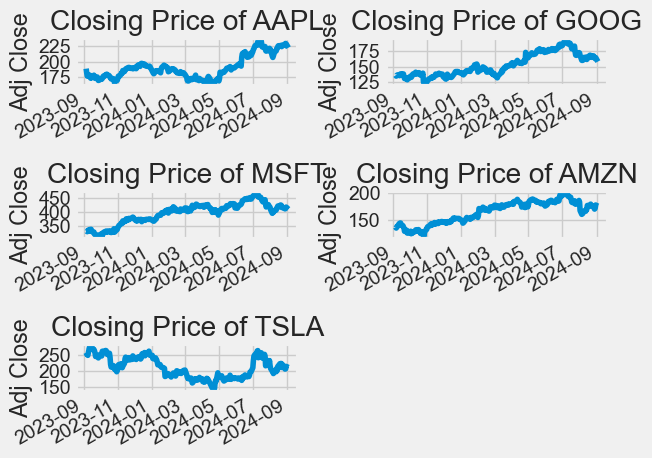

In [5]:
for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

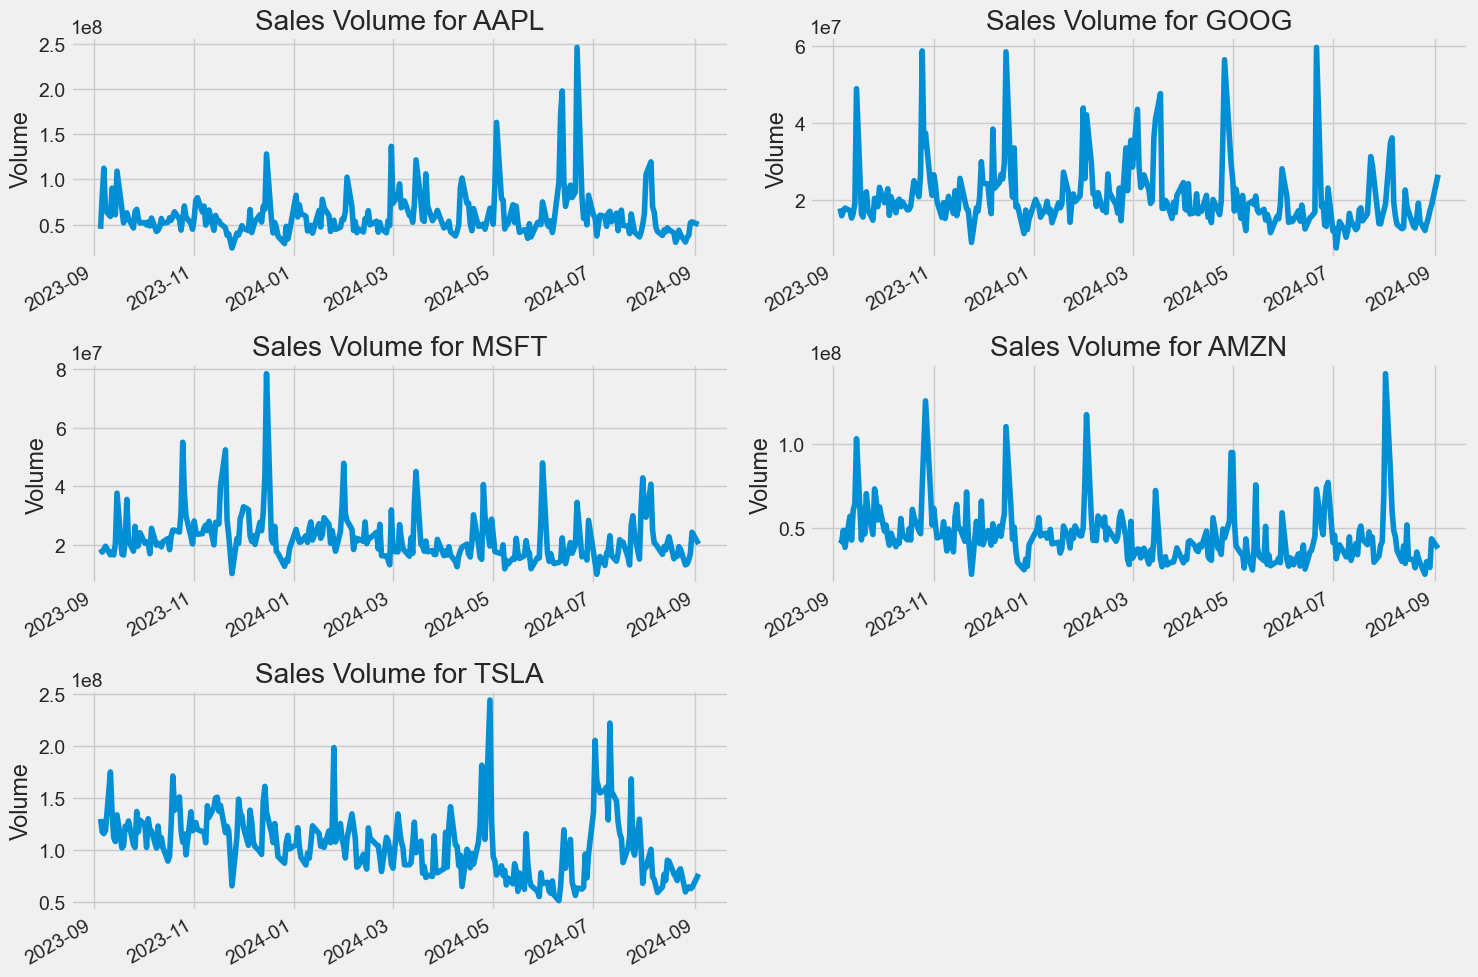

In [6]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

In [7]:
ma_day = [10, 20, 50] 

# Calculate moving averages and RSI for each company
for ma in ma_day:
    for company in company_list:
        column_name_ma = f"MA for {ma} days"
        company[column_name_ma] = company['Adj Close'].rolling(ma).mean()


In [8]:

# Calculate RSI for each company
rsi_period = 14  # RSI period
for company in company_list:
    delta = company['Adj Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=rsi_period, min_periods=1).mean()
    avg_loss = loss.rolling(window=rsi_period, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    company['RSI'] = rsi


In [9]:
company_name

['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON', 'TESLA']

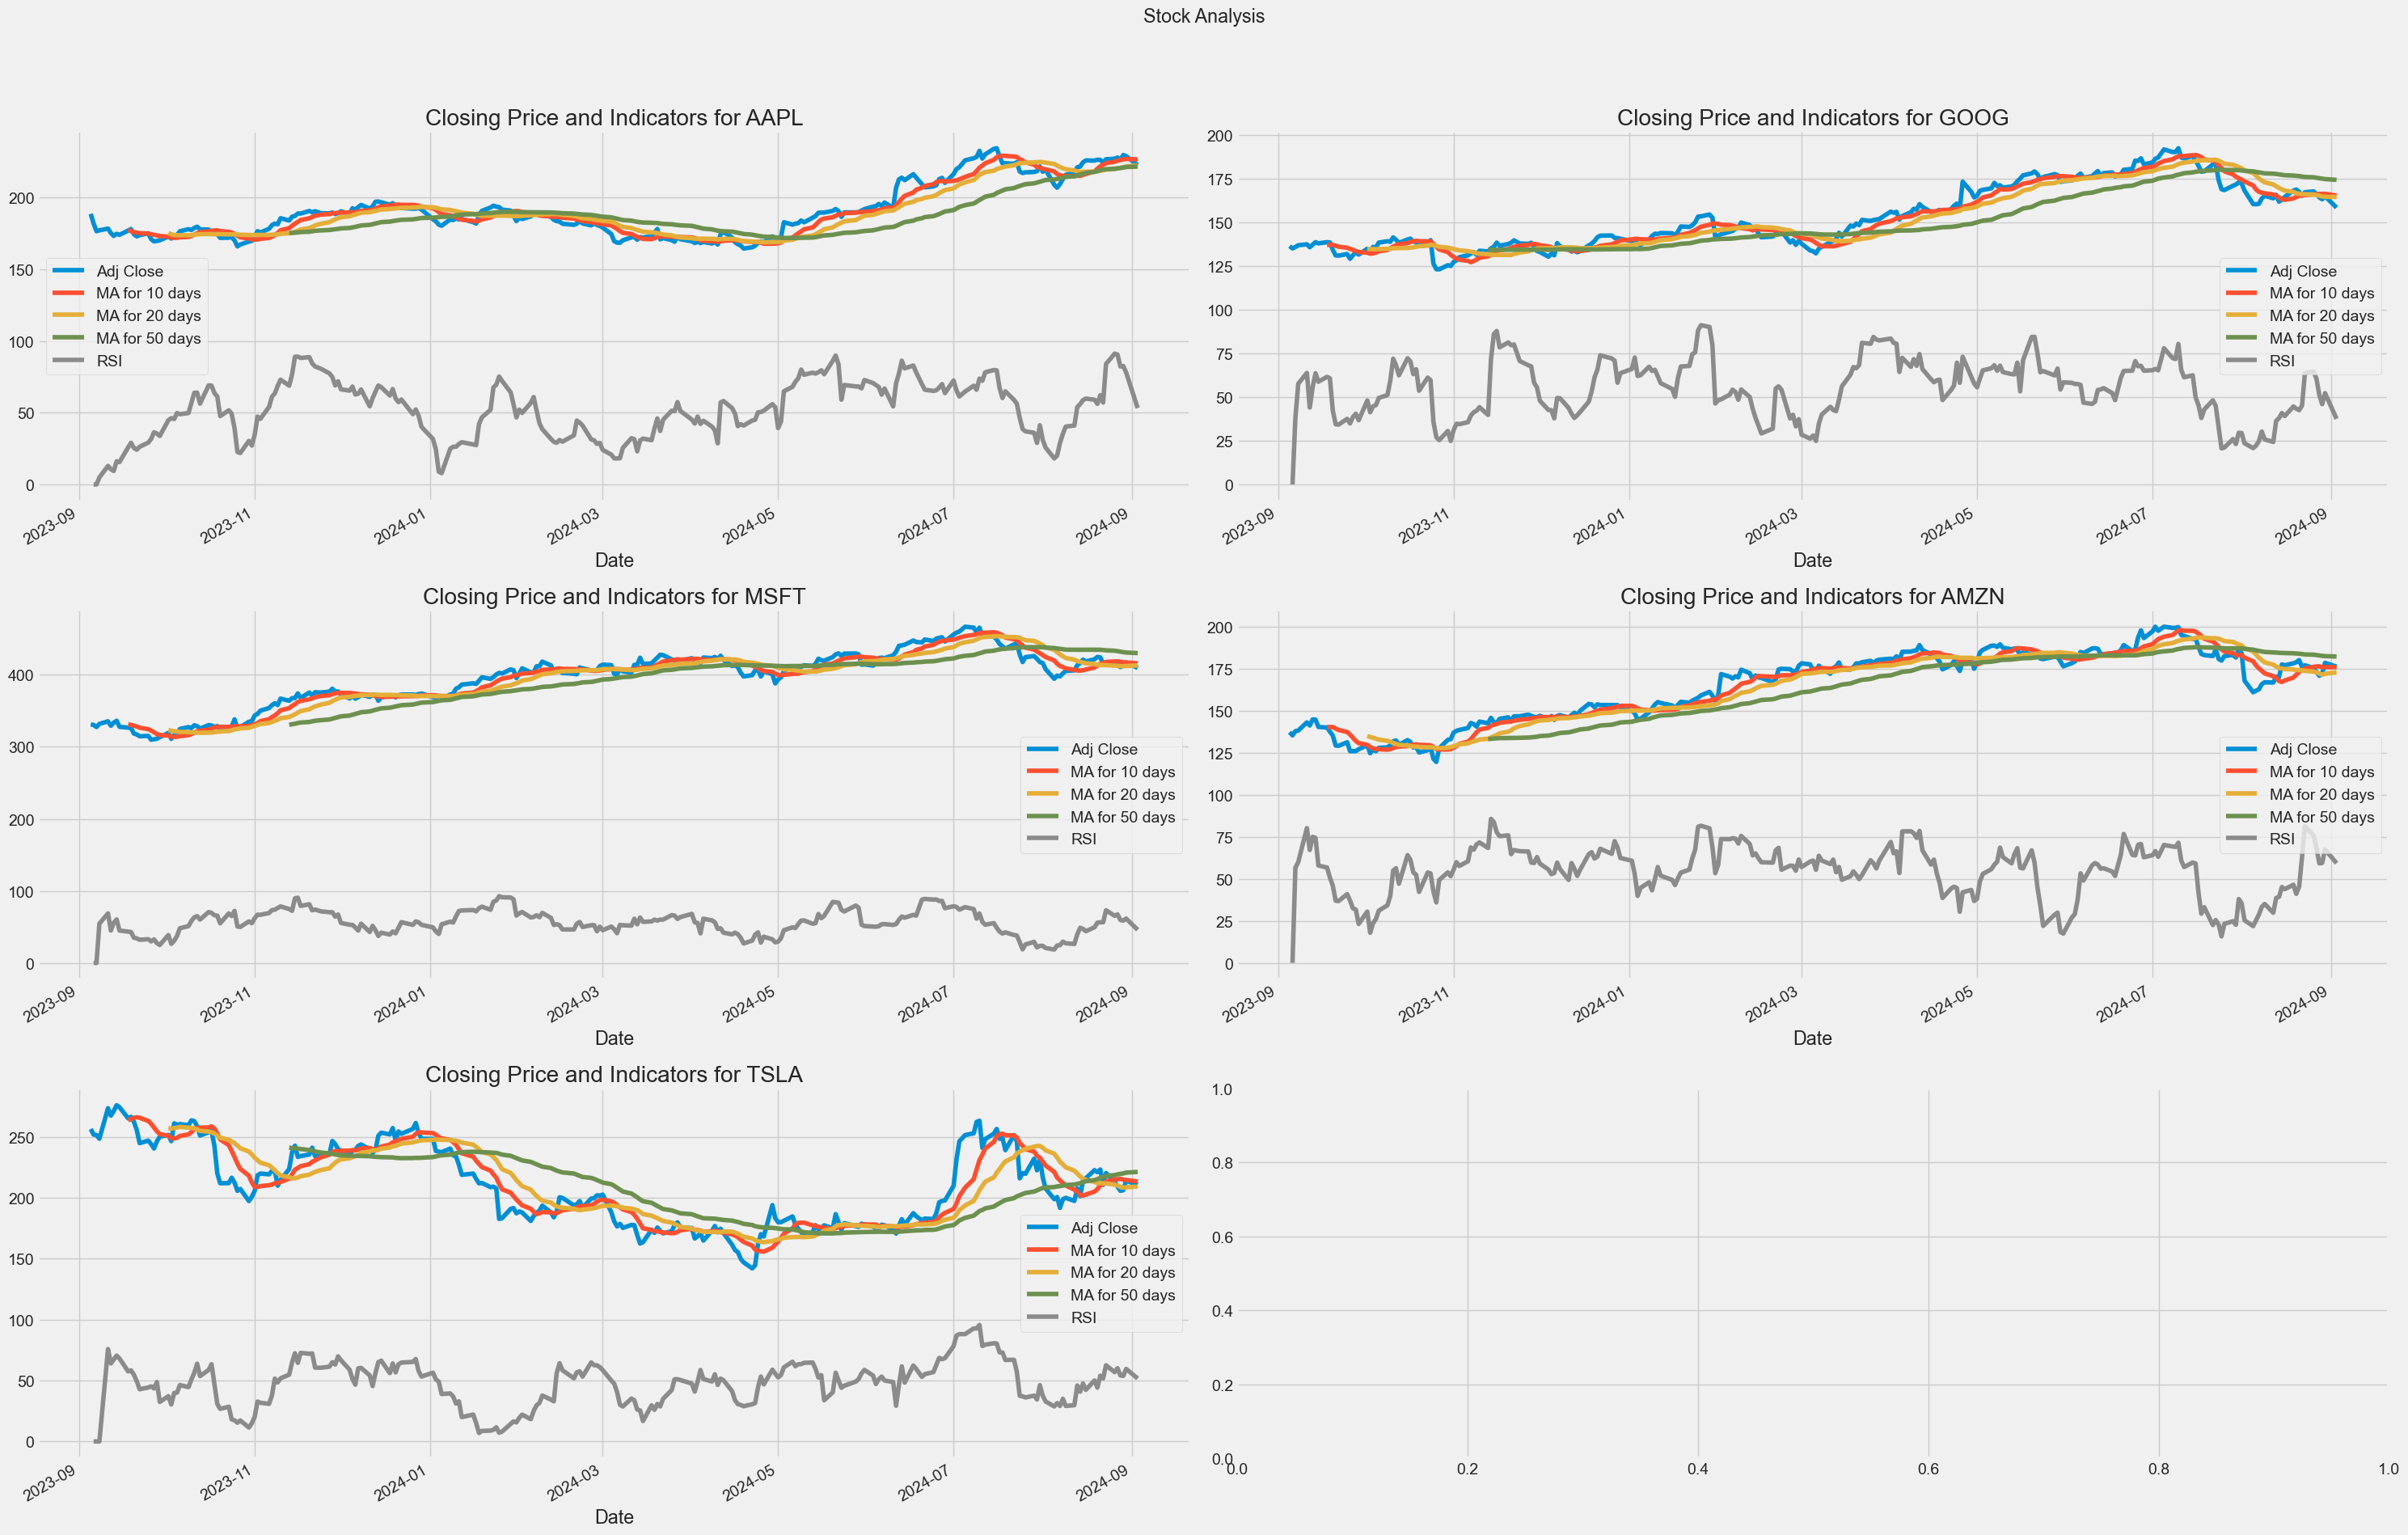

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(30, 20))
fig.suptitle('Stock Analysis')

# List of stock symbols
stock_symbols = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'TSLA']

# Function to plot the data for a given company
def plot_company_data(ax, company_df, stock_symbol):
    company_df[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'RSI']].plot(ax=ax)
    ax.set_title(f"Closing Price and Indicators for {stock_symbol}")
    ax.legend()

# Plot data for each company on separate graphs
for ax, company_df, stock_symbol in zip(axes.flatten(), [AAPL, GOOG, MSFT, AMZN, TSLA], stock_symbols):
    plot_company_data(ax, company_df, stock_symbol)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


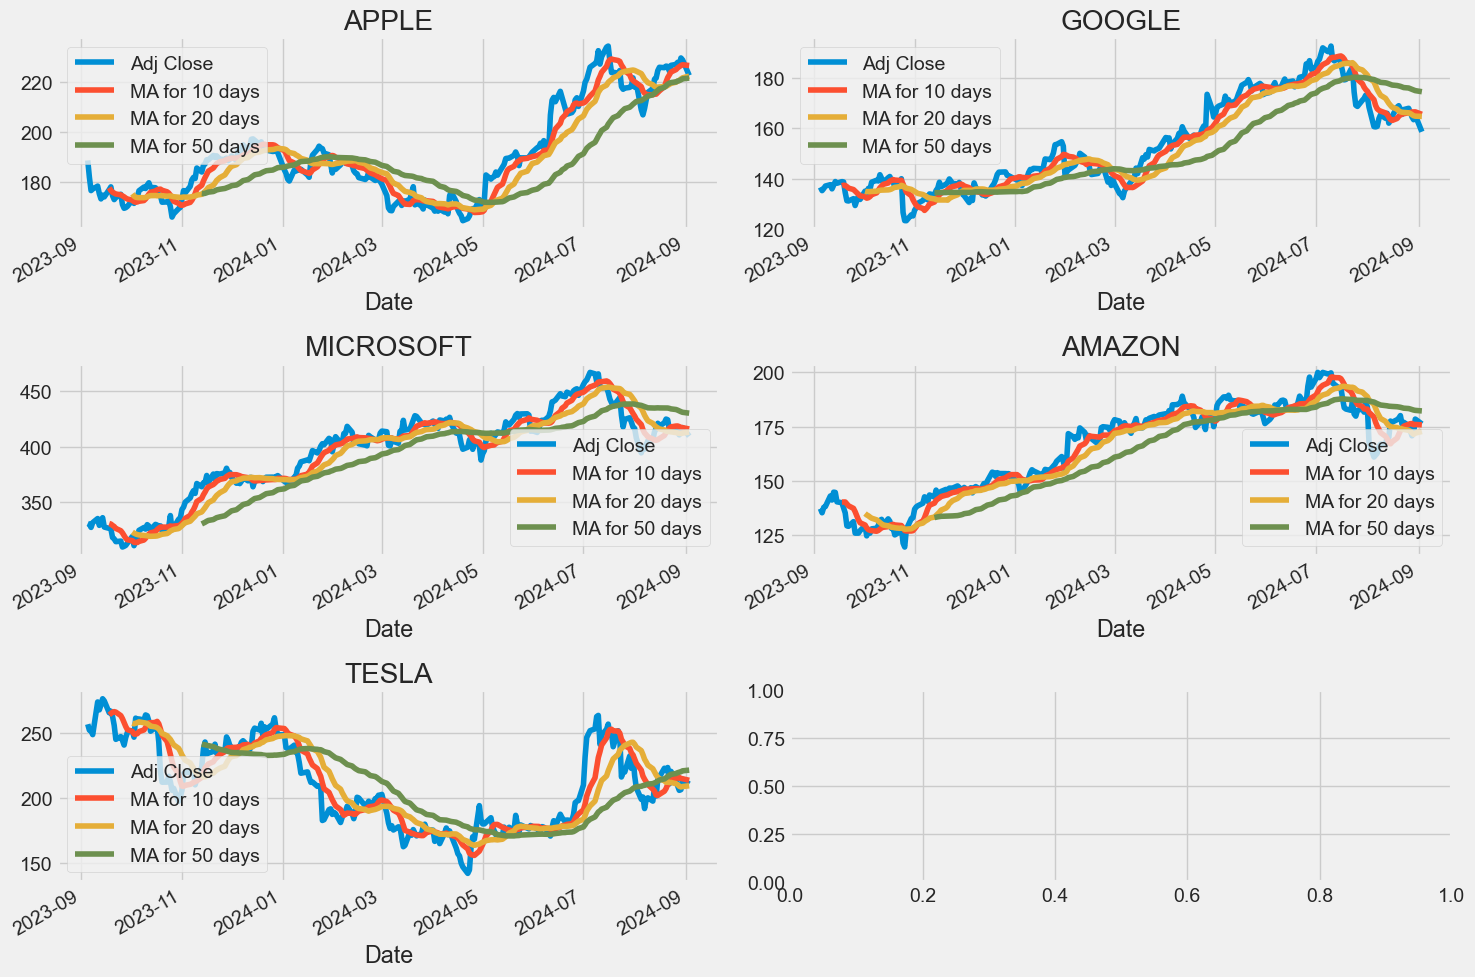

In [11]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0, 0])
axes[0, 0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0, 1])
axes[0, 1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1, 0])
axes[1, 0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1, 1])
axes[1, 1].set_title('AMAZON')

TSLA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2, 0])  # Use a different subplot for TSLA
axes[2, 0].set_title('TESLA')

fig.tight_layout()

plt.show()


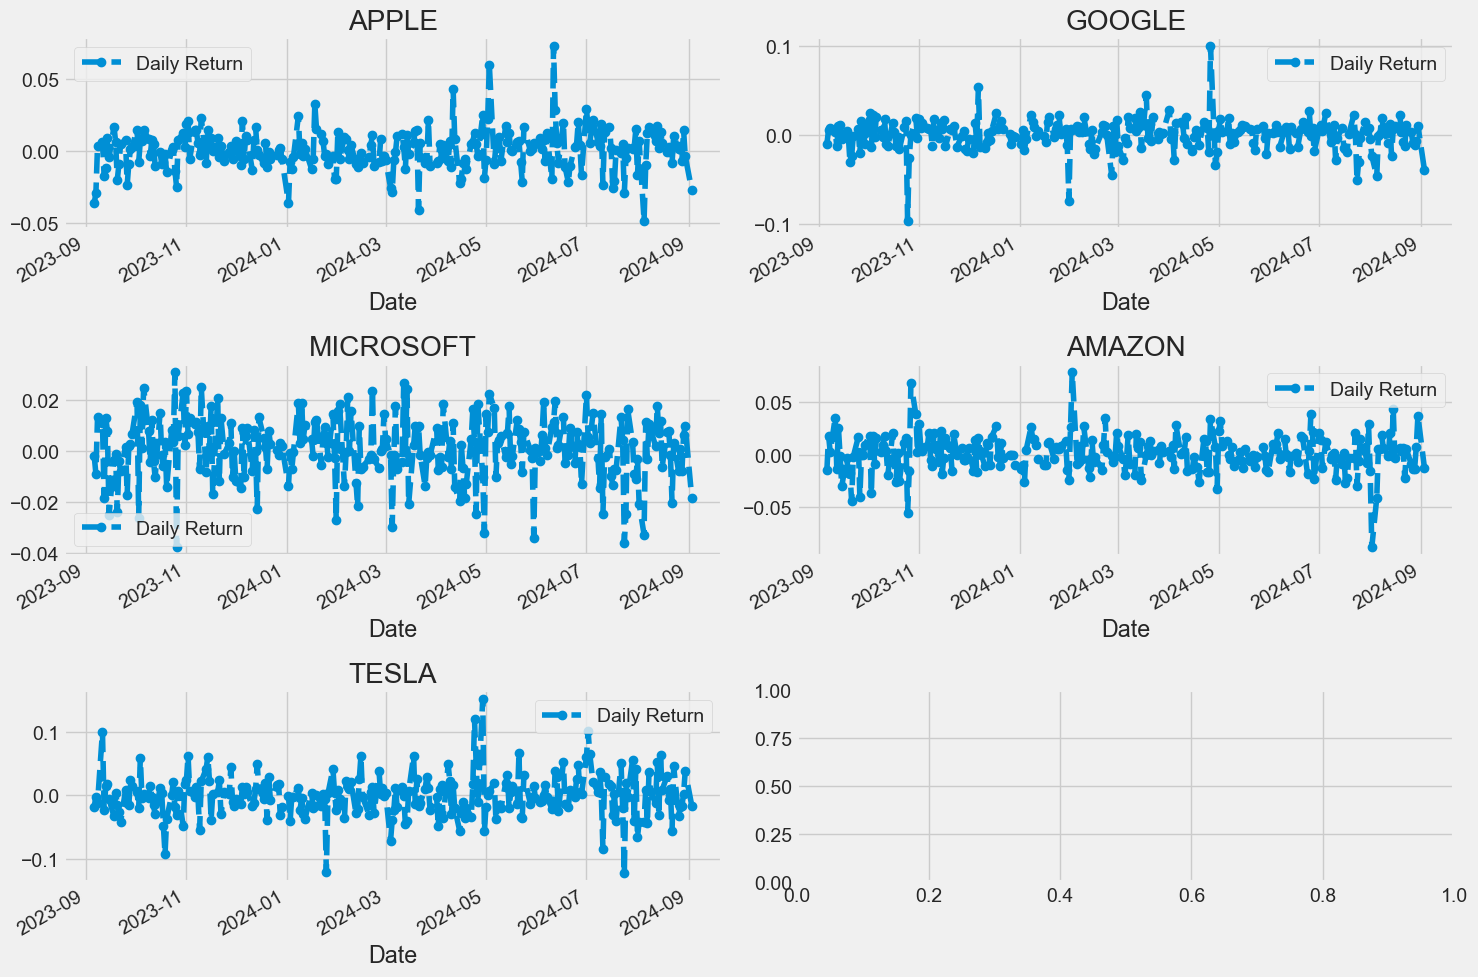

In [12]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

TSLA['Daily Return'].plot(ax=axes[2,0], legend=True, linestyle='--', marker='o')
axes[2,0].set_title('TESLA')

fig.tight_layout()

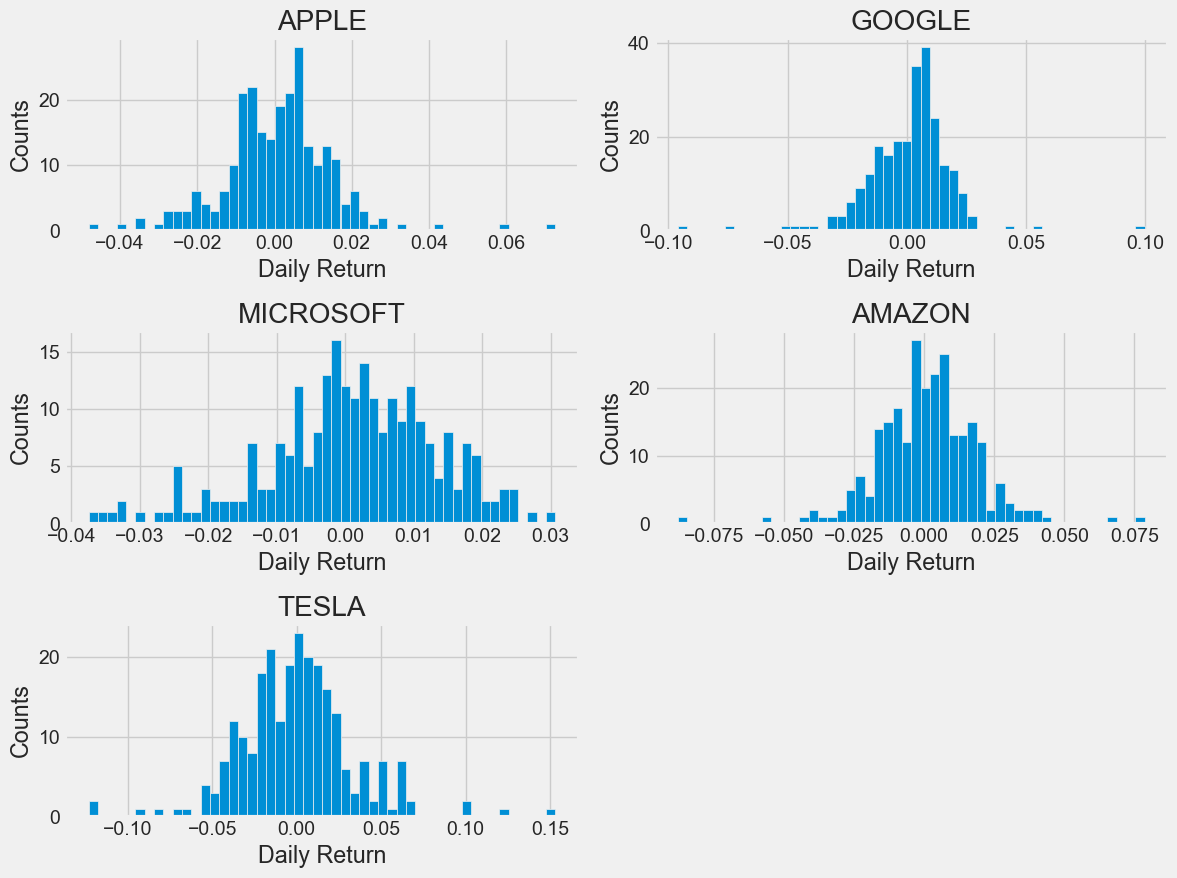

In [13]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [14]:
# Fetch historical data for tech stocks
closing_df = yf.download(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()


[*********************100%%**********************]  5 of 5 completed


Ticker,AAPL,AMZN,GOOG,MSFT,TSLA
Date,,,,,
2023-09-05,NaN,NaN,NaN,NaN,NaN
2023-09-06,-0.035793,-0.013914,-0.009802,-0.002009,-0.017817
2023-09-07,-0.029249,0.018395,0.006131,-0.008922,-0.001707
2023-09-08,0.003492,0.002757,0.007342,0.013216,-0.011889
2023-09-11,0.006623,0.035231,0.003936,0.010979,0.100925


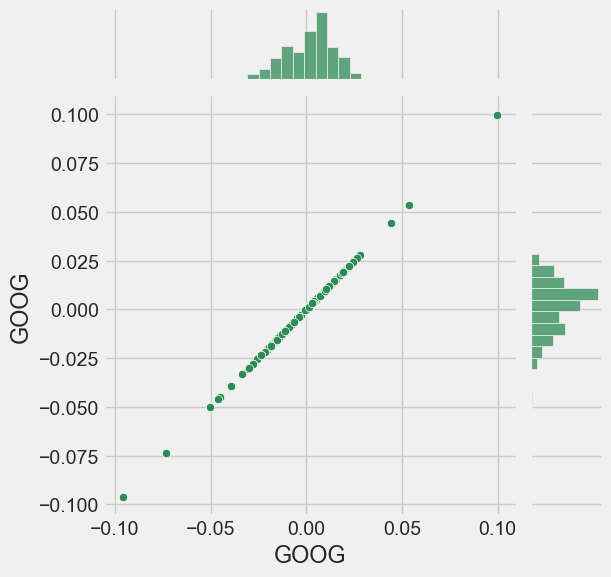

In [15]:
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

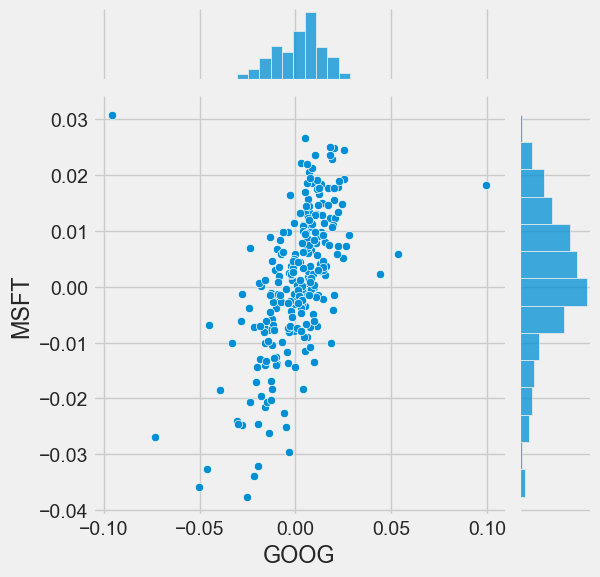

In [16]:
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

c:\Users\ASUS TUF\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


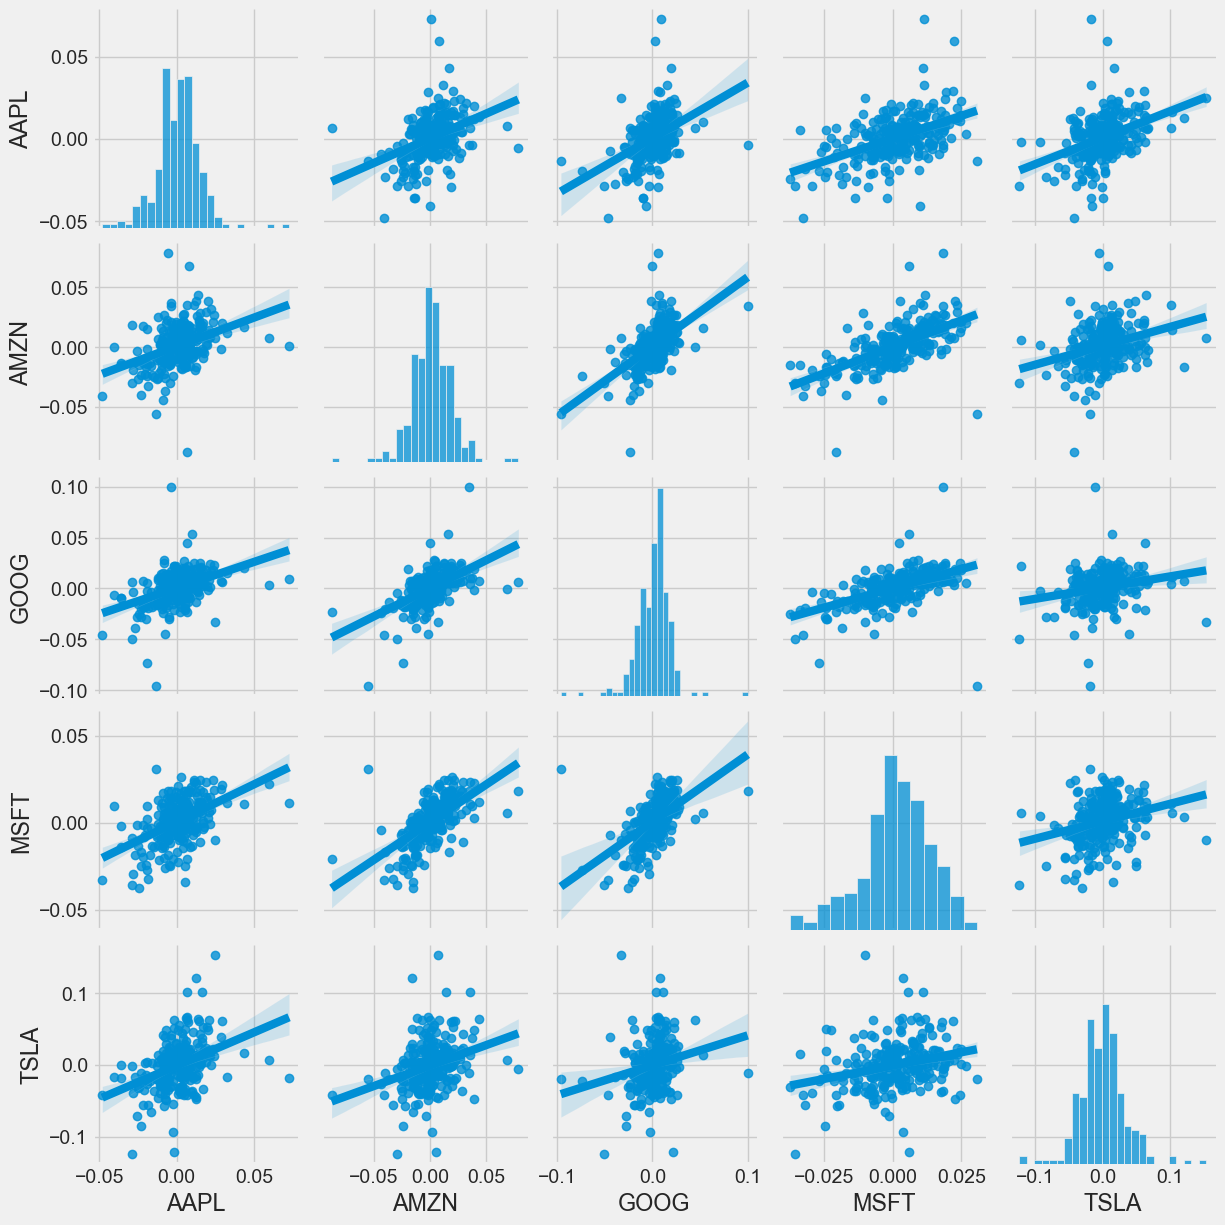

In [17]:
sns.pairplot(tech_rets, kind='reg')

Text(0.5, 1.0, 'Correlation of stock closing price')

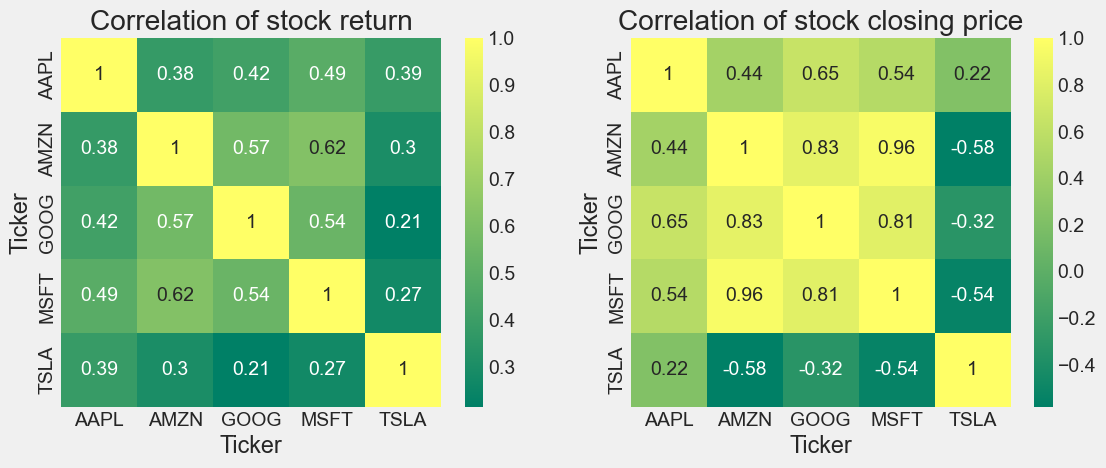

In [18]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price' )

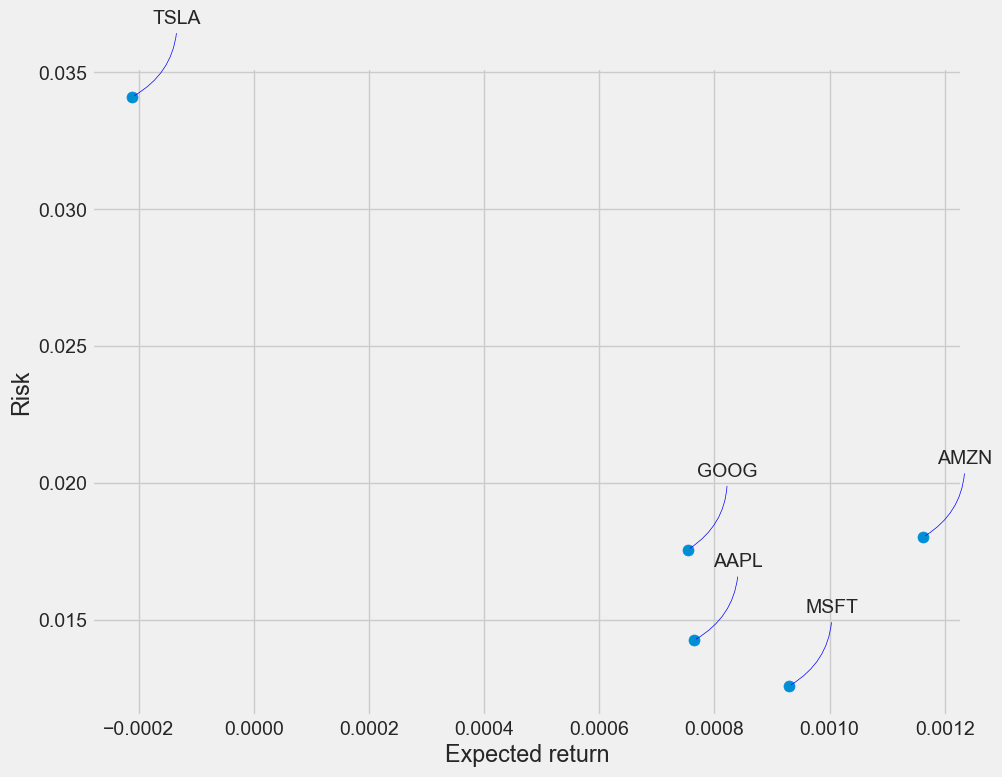

In [19]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [20]:
# Get the stock quote
df = yf.download('TSLA', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,1.929333,1.966667,1.843333,1.872000,1.872000,13921500
2012-01-04,1.880667,1.911333,1.833333,1.847333,1.847333,9451500
2012-01-05,1.850667,1.862000,1.790000,1.808000,1.808000,15082500
2012-01-06,1.813333,1.852667,1.760667,1.794000,1.794000,14794500
2012-01-09,1.800000,1.832667,1.741333,1.816667,1.816667,13455000
...,...,...,...,...,...,...
2024-08-27,213.250000,215.660004,206.940002,209.210007,209.210007,62821400
2024-08-28,209.720001,211.839996,202.589996,205.750000,205.750000,64116400
2024-08-29,209.800003,214.889999,205.970001,206.279999,206.279999,62308800


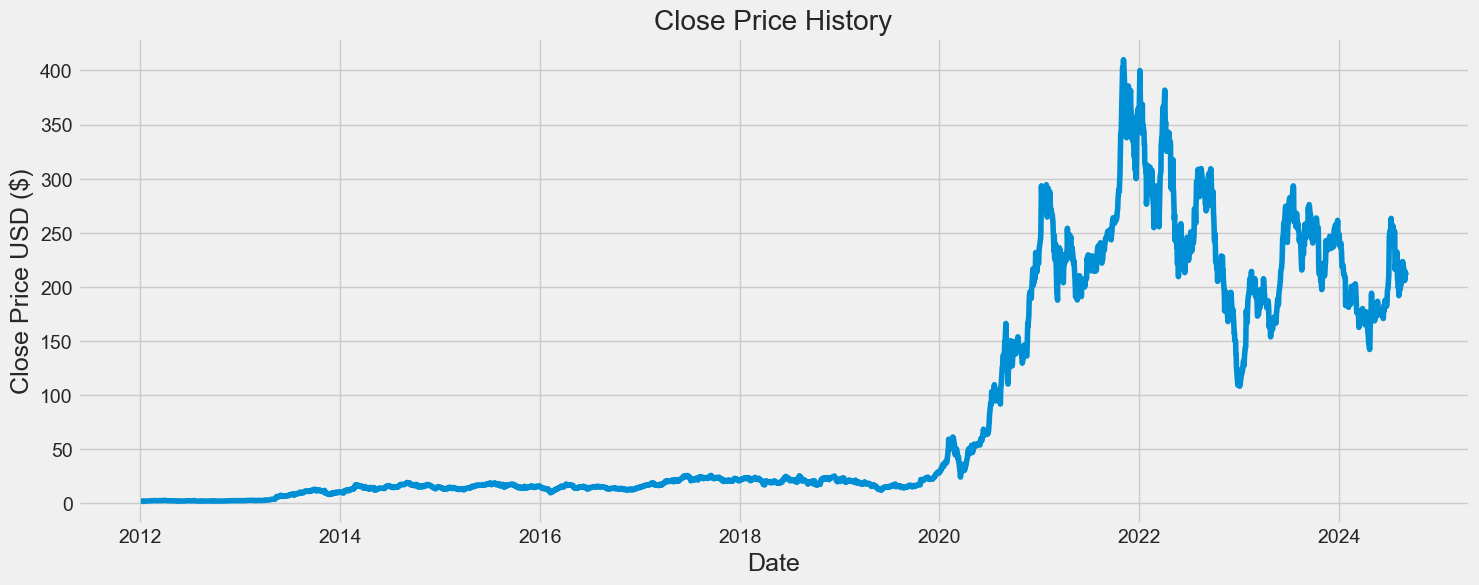

In [21]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

# Model Development

In [22]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

3028

In [23]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00086343],
       [0.00080303],
       [0.00070674],
       ...,
       [0.50131064],
       [0.52048065],
       [0.51188721]])

In [24]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00086343, 0.00080303, 0.00070674, 0.00067246, 0.00072796,
       0.00078834, 0.00088791, 0.00089117, 0.        , 0.00062186,
       0.00065614, 0.00064798, 0.00062186, 0.00064961, 0.0007557 ,
       0.00084547, 0.00100379, 0.00106745, 0.00110662, 0.00102501,
       0.00110825, 0.00121761, 0.00136451, 0.0014706 , 0.00143796,
       0.00149182, 0.00159791, 0.00135634, 0.00142   , 0.00169421,
       0.00176439, 0.00185906, 0.001988  , 0.00191129, 0.00186559,
       0.00191618, 0.00178887, 0.00176766, 0.00179867, 0.00173338,
       0.0018966 , 0.00183621, 0.00179214, 0.00168441, 0.00168605,
       0.00167789, 0.00195046, 0.00215775, 0.00217081, 0.00204023,
       0.0019929 , 0.00204513, 0.00198963, 0.00198637, 0.00201738,
       0.00189497, 0.00184274, 0.00238462, 0.00247276, 0.00245807])]
[0.0023731972591546557]

[array([0.00086343, 0.00080303, 0.00070674, 0.00067246, 0.00072796,
       0.00078834, 0.00088791, 0.00089117, 0.        , 0.00062186,
       0.00065614, 0.00064798, 0.

In [25]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1), activation='relu'))
model.add(Dropout(0.2))  # Dropout layer to prevent overfitting
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=5, epochs=25)  # Adjust epochs and batch size as needed


Epoch 1/25


c:\Users\ASUS TUF\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


594/594 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - loss: 0.0119
Epoch 2/25
594/594 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - loss: 0.0019
Epoch 3/25
594/594 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 0.0016
Epoch 4/25
594/594 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - loss: 0.0013
Epoch 5/25
594/594 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 0.0010
Epoch 6/25
594/594 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 0.0011
Epoch 7/25
594/594 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - loss: 8.1695e-04
Epoch 8/25
594/594 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - loss: 6.7059e-04
Epoch 9/25
594/594 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - loss: 8.1891e-04
Epoch 10/25
594/594 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - loss: 6.0606e-04
Epoch 11/25
594/594 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - loss: 6.0645e-04
Epoch 12/25
594/594 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - loss: 7.1745e-04
Epoch 13/25
594/594 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - loss: 6.1201e-04
Epoch 14/25
594/594 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - loss: 6.4797e-04
Epoch 15

In [26]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


9.052590625231458

C:\Users\ASUS TUF\AppData\Local\Temp\ipykernel_1240\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


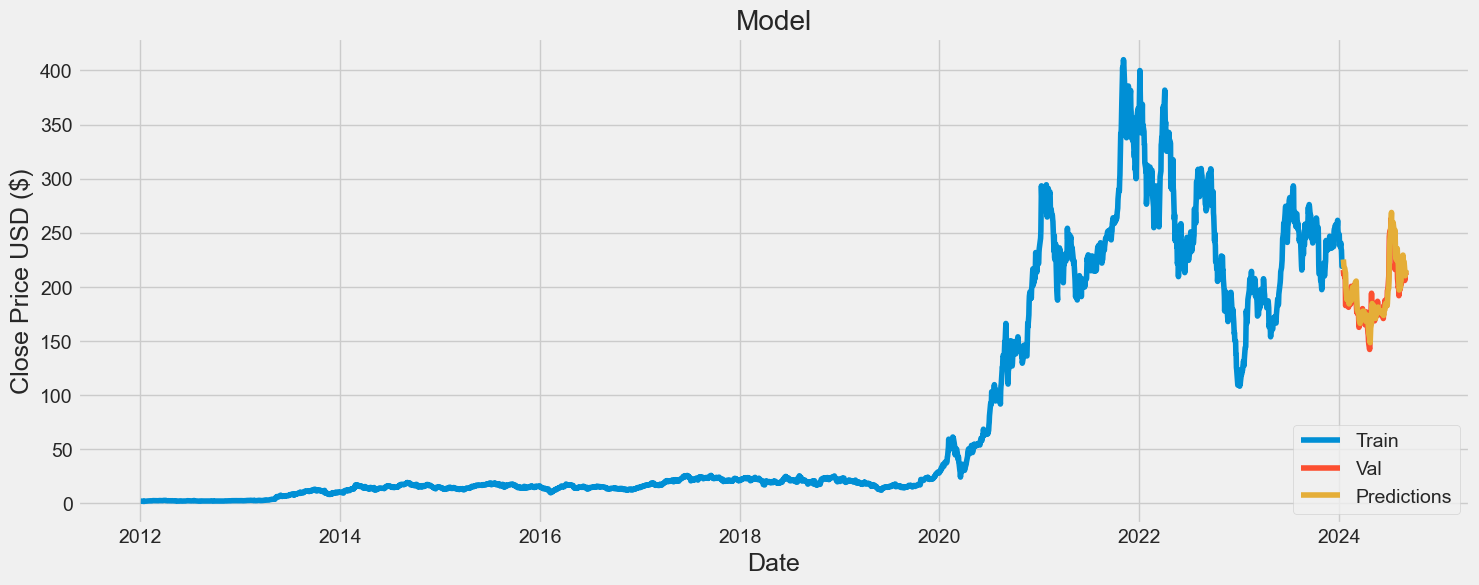

In [27]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()